In [2]:
import pandas as pd

# 1장.

### 테크닉1. 데이터 읽어들이기

In [3]:
customer_mas = pd.read_csv('customer_master.csv')
customer_mas.head()

,customer_id,customer_name,registration_date,email,gender,age,birth,pref
0,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시
1,TS808488,김예준,2019-01-01 1:13,tamura_shiori@example.com,F,33,1986-05-20,인천광역시
2,AS834628,김도윤,2019-01-01 2:00,hisano_yuki@example.com,F,63,1956-01-02,광주광역시
3,AS345469,김시우,2019-01-01 4:48,tsuruoka_kaoru@example.com,M,74,1945-03-25,인천광역시
4,GD892565,김주원,2019-01-01 4:54,oouchi_takashi@example.com,M,54,1965-08-05,울산광역시


In [4]:
item_mas = pd.read_csv('item_master.csv')
item_mas.head()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [5]:
trx1 = pd.read_csv('transaction_1.csv')
trx1.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [6]:
trx2 = pd.read_csv('transaction_2.csv')
trx2.head()

,transaction_id,price,payment_date,customer_id
0,T0000005113,295000,2019-06-15 07:20:27,TS169261
1,T0000005114,50000,2019-06-15 07:35:47,HI599892
2,T0000005115,85000,2019-06-15 07:56:36,HI421757
3,T0000005116,50000,2019-06-15 08:40:55,OA386378
4,T0000005117,120000,2019-06-15 08:44:23,TS506913


In [7]:
trx_detail_1 = pd.read_csv('transaction_detail_1.csv') 
trx_detail_1.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [8]:
trx_detail_2 = pd.read_csv('transaction_detail_2.csv') 
trx_detail_2.head()

,detail_id,transaction_id,item_id,quantity
0,5000,T0000004870,S002,3
1,5001,T0000004871,S003,1
2,5002,T0000004872,S001,2
3,5003,T0000004873,S004,1
4,5004,T0000004874,S003,2


### 테크닉2. 데이터결합(유니언)

In [9]:
trx = pd.concat([trx1, trx2])
trx.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [10]:
# Union 결과 확인

print(len(trx1))
print(len(trx2))
print(len(trx))

5000
1786
6786


In [11]:
trx_detail = pd.concat([trx_detail_1,trx_detail_2])
trx_detail.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [12]:
# Union 결과 확인

print(len(trx_detail_1))
print(len(trx_detail_2))
print(len(trx_detail))

5000
2144
7144


### 테크닉3. 데이터결합 (조인))

In [13]:
# 매출데이터 조인
trx_join = pd.merge(trx_detail, trx[["transaction_id", "payment_date", "customer_id"]], how="left", on="transaction_id")
trx_join.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865


In [14]:
# mas 데이터 조인
join_data = pd.merge(trx_join, customer_mas, how="left", on="customer_id")
join_data = pd.merge(join_data, item_mas, how="left", on="item_id")
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-C,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,PC-B,85000


### 테크닉4. 필요한 데이터 컬럼을 만들자

In [15]:
join_data["total_price"] = join_data["quantity"] * join_data["item_price"]
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price,total_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,PC-A,50000,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-C,120000,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,PC-B,85000,170000


###  테크닉5. 검산

In [16]:
print(join_data["total_price"].sum())
print(trx["price"].sum())

971135000
971135000


In [17]:
join_data["total_price"].sum() == trx["price"].sum()

True

### 테크닉6. 각종 통계량 검사

In [18]:
join_data.isnull()
# join_data.isnull()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price,total_price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7139,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7140,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7141,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7142,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
join_data.describe()

,detail_id,quantity,age,item_price,total_price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,50.265677,121698.628219,135937.150056
std,2062.439494,0.513647,17.190314,64571.311830,68511.453297
min,0.000000,1.000000,20.000000,50000.000000,50000.000000
25%,1785.750000,1.000000,36.000000,50000.000000,85000.000000
50%,3571.500000,1.000000,50.000000,102500.000000,120000.000000
75%,5357.250000,1.000000,65.000000,187500.000000,210000.000000
max,7143.000000,4.000000,80.000000,210000.000000,420000.000000


In [20]:
print(join_data["payment_date"].min())
print(join_data["payment_date"].max())

2019-02-01 01:36:57
2019-07-31 23:41:38


### 테크닉8. 월별 매출구하기 (groupby)

In [21]:
join_data["payment_date"] = pd.to_datetime(join_data["payment_date"])
join_data["payment_date"]

0      2019-02-01 01:36:57
1      2019-02-01 01:37:23
2      2019-02-01 02:34:19
3      2019-02-01 02:47:23
4      2019-02-01 04:33:46
               ...        
7139   2019-07-31 21:20:44
7140   2019-07-31 21:52:48
7141   2019-07-31 23:35:25
7142   2019-07-31 23:39:35
7143   2019-07-31 23:41:38
Name: payment_date, Length: 7144, dtype: datetime64[ns]

In [22]:
join_data["payment_month"] = join_data["payment_date"].dt.strftime("%Y%m")
join_data[["payment_date", "payment_month"]].head()

,payment_date,payment_month
0,2019-02-01 01:36:57,201902
1,2019-02-01 01:37:23,201902
2,2019-02-01 02:34:19,201902
3,2019-02-01 02:47:23,201902
4,2019-02-01 04:33:46,201902


In [23]:
join_data.groupby("payment_month").sum()["total_price"]

payment_month
201902    160185000
201903    160370000
201904    160510000
201905    155420000
201906    164030000
201907    170620000
Name: total_price, dtype: int64

### 테크닉9. 월별/ 상품별 groupby

In [24]:
join_data.groupby(["payment_month", "item_name"]).sum()[["total_price", "quantity"]]

total_price  quantity
payment_month item_name                       
201902        PC-A          24150000       483
              PC-B          25245000       297
              PC-C          19800000       165
              PC-D          31140000       173
              PC-E          59850000       285
201903        PC-A          26000000       520
              PC-B          25500000       300
              PC-C          19080000       159
              PC-D          25740000       143
              PC-E          64050000       305
201904        PC-A          25900000       518
              PC-B          23460000       276
              PC-C          21960000       183
              PC-D          24300000       135
              PC-E          64890000       309
201905        PC-A          24850000       497
              PC-B          25330000       298
              PC-C          20520000       171
              PC-D          25920000       144
              PC-E          58800000       280
201906        PC-A          26000000       520
              PC-B          23970000       282
              PC-C          21840000       182
              PC-D          28800000       160
              PC-E          63420000       302
201907        PC-A          25250000       505
              PC-B          28220000       332
              PC-C          19440000       162
              PC-D          26100000       145
              PC-E          71610000       341

In [25]:
pd.pivot_table(join_data, index="item_name", columns="payment_month", values=["total_price", "quantity"])

quantity                                                    \
payment_month    201902    201903    201904    201905    201906    201907   
item_name                                                                   
PC-A           1.446108  1.428571  1.403794  1.372928  1.464789  1.406685   
PC-B           1.253165  1.260504  1.277778  1.236515  1.215517  1.252830   
PC-C           1.085526  1.111888  1.089286  1.110390  1.089820  1.117241   
PC-D           1.061350  1.028777  1.062992  1.043478  1.066667  1.035714   
PC-E           1.025180  1.026936  1.016447  1.018182  1.013423  1.020958   

                 total_price                                               \
payment_month         201902         201903         201904         201905   
item_name                                                                   
PC-A            72305.389222   71428.571429   70189.701897   68646.408840   
PC-B           106518.987342  107142.857143  108611.111111  105103.734440   
PC-C           130263.157895  133426.573427  130714.285714  133246.753247   
PC-D           191042.944785  185179.856115  191338.582677  187826.086957   
PC-E           215287.769784  215656.565657  213453.947368  213818.181818   

                                             
payment_month         201906         201907  
item_name                                    
PC-A            73239.436620   70334.261838  
PC-B           103318.965517  106490.566038  
PC-C           130778.443114  134068.965517  
PC-D           192000.000000  186428.571429  
PC-E           212818.791946  214401.197605

### 테크닉10. 데이터 가시화

In [26]:
graph_data = pd.pivot_table(join_data, index='payment_month', columns='item_name', values='total_price', aggfunc='sum')
graph_data.head()

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_month,,,,,
201902,24150000,25245000,19800000,31140000,59850000
201903,26000000,25500000,19080000,25740000,64050000
201904,25900000,23460000,21960000,24300000,64890000
201905,24850000,25330000,20520000,25920000,58800000
201906,26000000,23970000,21840000,28800000,63420000


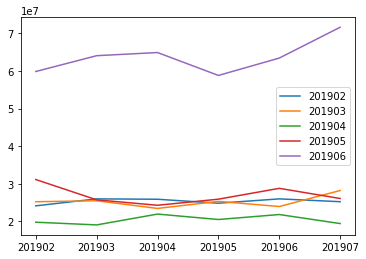

In [31]:
import matplotlib.pyplot as plt

plt.plot(list(graph_data.index), graph_data["PC-A"], label="PC-A")
plt.plot(list(graph_data.index), graph_data["PC-B"], label="PC-B")
plt.plot(list(graph_data.index), graph_data["PC-C"], label="PC-C")
plt.plot(list(graph_data.index), graph_data["PC-D"], label="PC-D")
plt.plot(list(graph_data.index), graph_data["PC-E"], label="PC-E")
plt.legend(list(graph_data.index))